In [31]:
# set the output file name
#outFileName = 'Out_File_Name'

# set the path of the directory where your modules are
modulesPath = 'C:\\Users\\email\\Documents\\GitHub\\AdvDataMining\\__Repo__'

In [32]:
import os
import sys

if os.path.isdir(modulesPath) and modulesPath not in sys.path:
    sys.path.append(modulesPath)

modulesList = os.listdir(modulesPath)
print('Available Files and Modules for the project:', modulesList,sep='\n')


from collections import defaultdict
import itertools

%matplotlib inline

import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import data_understanding
import data_preparation
import df_handle
import modeling
import model_evaluation
from sklearn.decomposition import PCA


Available Files and Modules for the project:
['datatest.txt', 'datatest2.txt', 'datatraining.txt', 'data_preparation.py', 'data_understanding.py', 'df_handle.py', 'logisticReg_pred_results.csv', 'modeling.py', 'model_evaluation.py', '__pycache__']


In [33]:
df = df_handle.setup_df('datatraining.txt')

In [34]:
X_train, X_test, y_train, y_test = df_handle.setup_df('datatraining.txt', 'Occupancy', 'datatest.txt')
#X_Train are the dependent variables in the training set and y_train is the independent variable in the training test (Occupancy)

In [35]:
del X_train['date']
del X_test['date']

# PCA w DT

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [37]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(8143, 2)

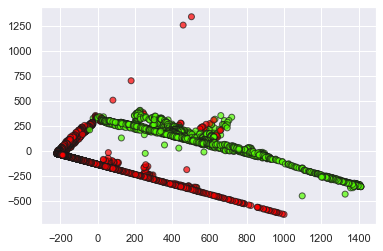

In [38]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [39]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.975234521575985
F1-score [0.98025135 0.9668008 ]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665



# PCA w K=2 w KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

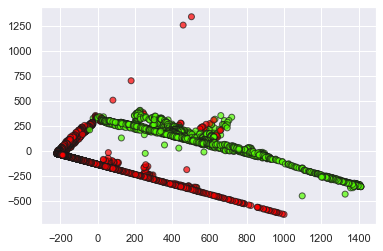

In [42]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [43]:
X_test_pca = pca.transform(X_test)

clf = KNeighborsClassifier(weights='uniform', n_neighbors=26)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98261391 0.97091274]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



# PCA w K=2 w NB

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
#seleziona il modello
clf = GaussianNB()

#fitta il modello
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

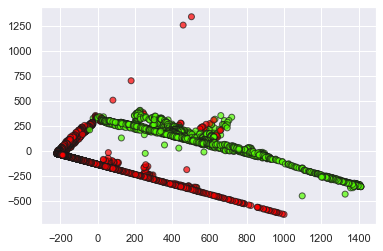

In [47]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [48]:
X_test_pca = pca.transform(X_test)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Accuracy 0.9482176360225141
F1-score [0.95756458 0.93358999]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1693
           1       0.88      1.00      0.93       972

    accuracy                           0.95      2665
   macro avg       0.94      0.96      0.95      2665
weighted avg       0.95      0.95      0.95      2665



 # PCA w K=2 w LR

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
#seleziona il modello
clf = LogisticRegression(random_state=0)

#fitta il modello
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

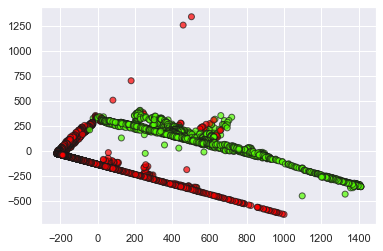

In [52]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [53]:
data=pd.DataFrame({"1st": X_train_pca[:, 0], "2nd": X_train_pca[:, 1], 'Occupancy(train)': y_train})

In [54]:
data

,1st,2nd,Occupancy(train)
1,239.754151,222.700217,1
2,234.837346,229.073523,1
3,232.823636,226.168071,1
4,228.128650,228.517767,1
5,224.775187,230.195464,1
...,...,...,...
8139,301.954450,199.272532,1
8140,303.965870,198.267635,1
8141,312.014642,194.239287,1
8142,331.539689,184.467919,1


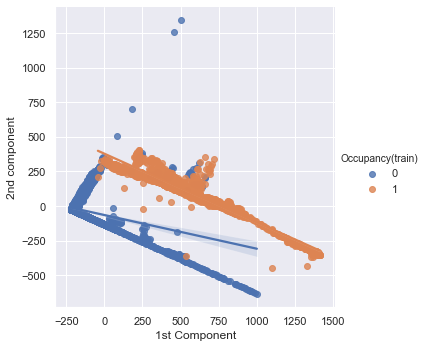

In [55]:
import seaborn as sns
sns.set()


# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(x='1st', y='2nd', hue='Occupancy(train)',
               height=5, data=data)

# Use more informative axis labels than are provided by default
g.set_axis_labels("1st Component", "2nd component")

In [56]:
sampleddata=data.sample(n=1000)

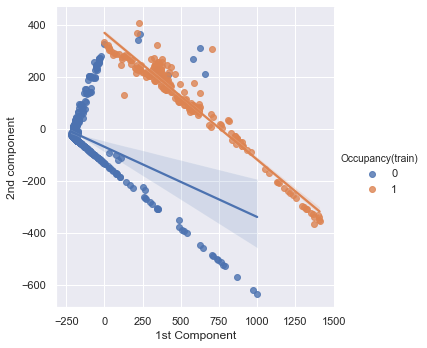

In [57]:
import seaborn as sns
sns.set()


# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(x='1st', y='2nd', hue='Occupancy(train)',
               height=5, data=sampleddata)

# Use more informative axis labels than are provided by default
g.set_axis_labels("1st Component", "2nd component")

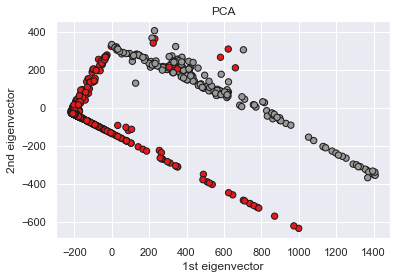

In [58]:



X_pca = PCA(n_components=2).fit_transform(sampleddata)
plt.scatter(sampleddata['1st'], sampleddata['2nd'], c=sampleddata['Occupancy(train)'], cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

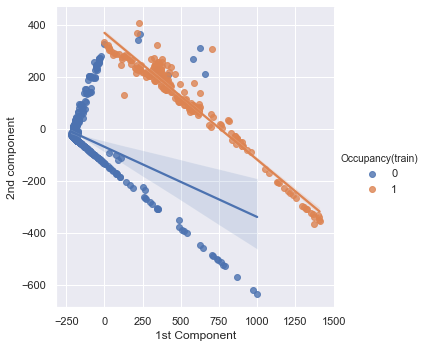

In [59]:
import seaborn as sns
sns.set()


# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(x='1st', y='2nd', hue='Occupancy(train)',
               height=5, data=sampleddata)

# Use more informative axis labels than are provided by default
g.set_axis_labels("1st Component", "2nd component")

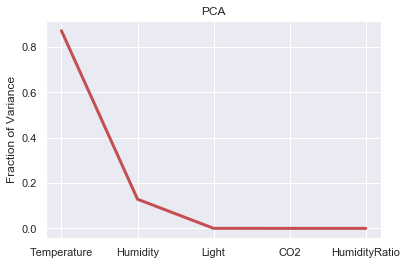

In [60]:
plt.plot(PCA(n_components=5).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range (5), X_train.columns)
plt.show()

In [61]:
X_test_pca = pca.transform(X_test)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98260348 0.97094188]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



Verifying logistic regression on datatest2

In [62]:
df = df_handle.setup_df('datatraining.txt')

In [65]:
X_train, X_test, y_train, y_test = df_handle.setup_df('datatraining.txt', 'Occupancy', 'datatest2.txt')
#X_Train are the dependent variables in the training set and y_train is the independent variable in the training test (Occupancy)

In [66]:
del X_train['date']
del X_test['date']

In [67]:
#seleziona il modello
clf = LogisticRegression(random_state=0)

#fitta il modello
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [69]:
X_test_pca = pca.transform(X_test)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.993129614438064
F1-score [0.9956383  0.98382814]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.99      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752



In [70]:
pd.__version__

'1.0.1'